In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("C:\\Users\santh\Desktop\PhiUSIIL_Phishing_URL_Dataset.csv")

In [3]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
URLLength,235795.0,34.573095,41.314153,13.000000,23.000000,27.000000,34.000000,6.097000e+03
DomainLength,235795.0,21.470396,9.150793,4.000000,16.000000,20.000000,24.000000,1.100000e+02
IsDomainIP,235795.0,0.002706,0.051946,0.000000,0.000000,0.000000,0.000000,1.000000e+00
URLSimilarityIndex,235795.0,78.430778,28.976055,0.155574,57.024793,100.000000,100.000000,1.000000e+02
CharContinuationRate,235795.0,0.845508,0.216632,0.000000,0.680000,1.000000,1.000000,1.000000e+00
TLDLegitimateProb,235795.0,0.260423,0.251628,0.000000,0.005977,0.079963,0.522907,5.229071e-01
URLCharProb,235795.0,0.055747,0.010587,0.001083,0.050747,0.057970,0.062875,9.082366e-02
TLDLength,235795.0,2.764456,0.599739,2.000000,2.000000,3.000000,3.000000,1.300000e+01
NoOfSubDomain,235795.0,1.164758,0.600969,0.000000,1.000000,1.000000,1.000000,1.000000e+01
HasObfuscation,235795.0,0.002057,0.045306,0.000000,0.000000,0.000000,0.000000,1.000000e+00


In [5]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [7]:
df.nunique() # Unique Values in each column

FILENAME                      235795
URL                           235370
URLLength                        482
Domain                        220086
DomainLength                     101
IsDomainIP                         2
TLD                              695
URLSimilarityIndex             36360
CharContinuationRate             898
TLDLegitimateProb                465
URLCharProb                   227421
TLDLength                         12
NoOfSubDomain                     10
HasObfuscation                     2
NoOfObfuscatedChar                20
ObfuscationRatio                 146
NoOfLettersInURL                 421
LetterRatioInURL                 709
NoOfDegitsInURL                  182
DegitRatioInURL                  575
NoOfEqualsInURL                   25
NoOfQMarkInURL                     5
NoOfAmpersandInURL                31
NoOfOtherSpecialCharsInURL        74
SpacialCharRatioInURL            240
IsHTTPS                            2
LineOfCode                     10738
L

In [8]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore  

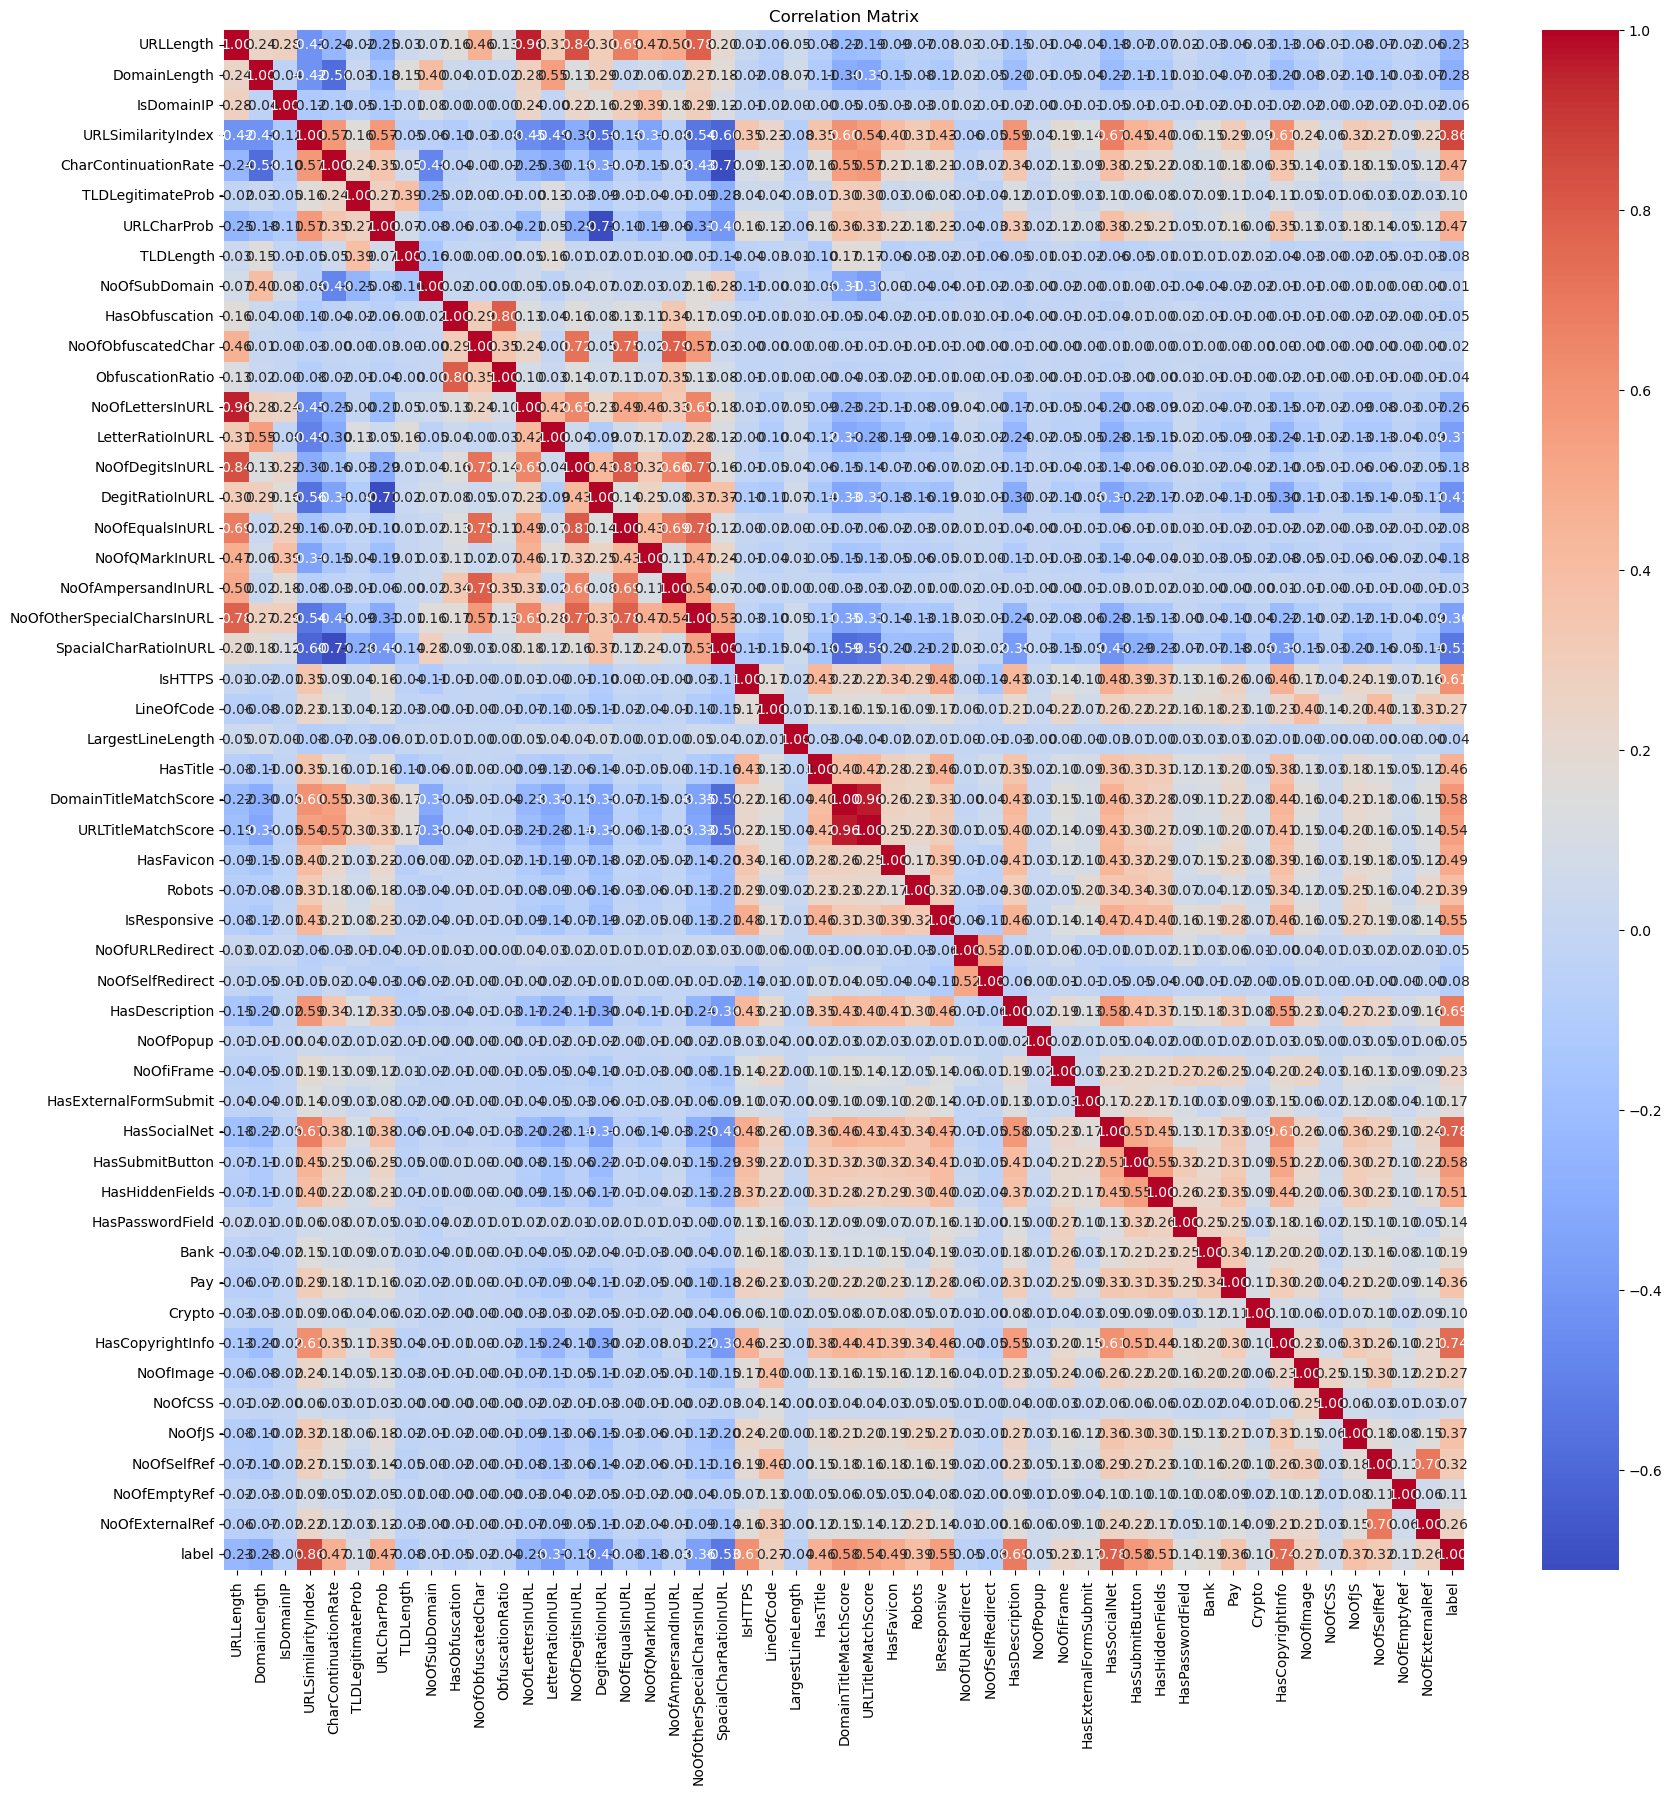

In [9]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Visualizing the correlation matrix for numeric columns only
plt.figure(figsize=(20, 20))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [10]:
df['label'].value_counts()

label
1    134850
0    100945
Name: count, dtype: int64

In [11]:
# Dropping the "filename" column from the dataset as i think its not very usefull
df = df.drop(columns=['FILENAME'])

In [12]:
df.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1


#### LSTM Classifier - This model is just keeping string values as X and label as Y

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense




tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['URL'] + df['Domain'] + df['TLD'] + df['Title'])
X = tokenizer.texts_to_sequences(df['URL'] + df['Domain'] + df['TLD'] + df['Title'])
X = pad_sequences(X)

y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

# Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 2741s 2s/step - accuracy: 0.9606 - loss: 0.0910 - val_accuracy: 0.9966 - val_loss: 0.0112
Epoch 2/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 2601s 2s/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9961 - val_loss: 0.0112
Epoch 3/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 2721s 2s/step - accuracy: 1.0000 - loss: 1.2389e-04 - val_accuracy: 0.9964 - val_loss: 0.0113
Epoch 4/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 2726s 2s/step - accuracy: 1.0000 - loss: 3.0125e-05 - val_accuracy: 0.9962 - val_loss: 0.0128
Epoch 5/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 2747s 2s/step - accuracy: 1.0000 - loss: 2.9664e-06 - val_accuracy: 0.9962 - val_loss: 0.0141
Epoch 6/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 2744s 2s/step - accuracy: 1.0000 - loss: 7.6957e-07 - val_accuracy: 0.9960 - val_loss: 0.0153
Epoch 7/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 2764s 2s/step - accuracy: 1.0000 - loss: 3.0117e-07 - val_accuracy: 0.9960 - val_loss: 0.0168
Epoch 8/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 3203s 2s/step 

In [ ]:
df.head()

## BERT based Model : Still in works will update as i finish it 

In [ ]:
! pip install tensorflow

In [ ]:
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

In [ ]:
print("Shape of tokenized inputs (input_ids):", train_inputs.input_ids.shape)
print("Shape of tokenized inputs (attention_mask):", train_inputs.attention_mask.shape)
print("Shape of labels:", train_labels.shape)


In [ ]:
# Check the shape of tokenized inputs
print("Shape of tokenized inputs:", train_inputs.shape)
print("Shape of labels:", train_labels.shape)


In [ ]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Loading pre-trained BERT model and tokenizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


# Tokenization
text_columns = ['URL', 'Title']
tokenized_inputs = {}
for col in text_columns:
    tokenized_inputs[col] = tokenizer(df[col].tolist(), padding=True, truncation=True, return_tensors='pt')


X = tokenized_inputs  # Features
Y = df['label']  # Labels

# Train-validation-test split
train_inputs, test_inputs, train_labels, test_labels = train_test_split(X, Y, test_size=0.2, random_state=42)
train_inputs, val_inputs, train_labels, val_labels = train_test_split(train_inputs, train_labels, test_size=0.2, random_state=42)

# optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.train()
for epoch in range(5):
    optimizer.zero_grad()
    inputs = tokenizer(train_texts['URL_tokens'].tolist(), train_texts['Title_tokens'].tolist(), padding=True, truncation=True, return_tensors='pt')
    inputs.to(device)
    labels = torch.tensor(train_labels.tolist()).to(device)
    outputs = model(**inputs, labels=labels)
    loss = outputs.loss
    loss.backward()
    optimizer.step()

# Evaluation
model.eval()
with torch.no_grad():
    inputs = tokenizer(test_texts['URL_tokens'].tolist(), test_texts['Title_tokens'].tolist(), padding=True, truncation=True, return_tensors='pt')
    inputs.to(device)
    labels = torch.tensor(test_labels.tolist()).to(device)
    outputs = model(**inputs, labels=labels)
    predictions = torch.argmax(outputs.logits, dim=1)
    accuracy = accuracy_score(test_labels.tolist(), predictions.tolist())
    report = classification_report(test_labels.tolist(), predictions.tolist())

print("Test Accuracy:", accuracy)
print("Classification Report:\n", report)


#### https://www.sciencedirect.com/science/article/pii/S2772918424000109

Please Refer to the above paper on Mutual information based logistic regression for phishing URL detection

In the paper they opted to exclude features that contained string-based values and instead concentrated solely on numerical types such as float or int. Upon inspection, it became evident that the columns displayed diverse data ranges. To mitigate this discrepancy, they employed min-max scaling. 

In [15]:
from sklearn.preprocessing import MinMaxScaler


X = df.drop('label', axis=1)
# Dropping string-based columns
X_numeric = X.drop(['URL', 'Domain', 'TLD', 'Title'], axis=1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_numeric)



In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Defining the numbers of features to select from Mutual Information.
num_features = [5, 10, 15, 20]

for k in num_features:
    # Performing mutual information feature selection
    selector = SelectKBest(score_func=mutual_info_classif, k=k)
    X_selected = selector.fit_transform(X_scaled, df['label'])  

    #selected feature indices
    selected_indices = selector.get_support(indices=True)
    selected_features = df.drop('label', axis=1).columns[selected_indices]
    print(f"Selected {k} features:", selected_features)


Selected 5 features: Index(['DomainLength', 'NoOfOtherSpecialCharsInURL', 'Bank',
       'HasCopyrightInfo', 'NoOfCSS'],
      dtype='object')
Selected 10 features: Index(['DomainLength', 'NoOfObfuscatedChar', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'HasDescription', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfCSS'],
      dtype='object')
Selected 15 features: Index(['DomainLength', 'NoOfObfuscatedChar', 'NoOfEqualsInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'LineOfCode', 'Robots', 'HasDescription',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfCSS'],
      dtype='object')
Selected 20 features: Index(['DomainLength', 'TLD', 'NoOfObfuscatedChar', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength',
       'DomainTitleMatchScore', 'Robots', 'HasDescripti

### SimpleDNNClassifier

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


selected_features = ['DomainLength', 'NoOfObfuscatedChar', 'NoOfEqualsInURL',
                     'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
                     'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength',
                     'DomainTitleMatchScore', 'Robots', 'HasDescription', 'NoOfPopup',
                     'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
                     'NoOfCSS']
X = df[selected_features].values
Y = df['label'].values


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.1)

# Evaluation
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10


C:\Users\santh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1327/1327 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.7705 - loss: 228.3397 - val_accuracy: 0.9314 - val_loss: 0.1890
Epoch 2/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.8086 - loss: 2.3367 - val_accuracy: 0.9139 - val_loss: 0.2441
Epoch 3/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.8036 - loss: 0.5353 - val_accuracy: 0.8552 - val_loss: 0.2117
Epoch 4/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.8341 - loss: 0.3903 - val_accuracy: 0.9353 - val_loss: 0.1694
Epoch 5/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.8494 - loss: 0.3288 - val_accuracy: 0.8849 - val_loss: 0.1457
Epoch 6/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - accuracy: 0.8872 - loss: 0.2647 - val_accuracy: 0.9480 - val_loss: 0.1077
Epoch 7/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.9197 - loss: 0.3003 - val_accuracy: 0.9799 - val_loss: 0.0542
Epoch 8/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.9502 - loss: 0.


### HybridCNN-LSTM :

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout

selected_features = ['DomainLength', 'NoOfObfuscatedChar', 'NoOfEqualsInURL',
                     'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
                     'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength',
                     'DomainTitleMatchScore', 'Robots', 'HasDescription', 'NoOfPopup',
                     'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
                     'NoOfCSS']
X = df[selected_features].values
Y = df['label'].values


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model
model = Sequential()
model.add(Embedding(input_dim=X_train.shape[1], output_dim=128, input_length=X_train.shape[1]))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.1)

# Evaluation
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

#model summary 
model.summary()


Epoch 1/10


C:\Users\santh\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1327/1327 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9328 - loss: 0.1714 - val_accuracy: 0.9493 - val_loss: 0.1195
Epoch 2/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9523 - loss: 0.1213 - val_accuracy: 0.9506 - val_loss: 0.1229
Epoch 3/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9544 - loss: 0.1158 - val_accuracy: 0.9528 - val_loss: 0.1133
Epoch 4/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9539 - loss: 0.1161 - val_accuracy: 0.9529 - val_loss: 0.1142
Epoch 5/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9547 - loss: 0.1153 - val_accuracy: 0.9530 - val_loss: 0.1133
Epoch 6/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9542 - loss: 0.1133 - val_accuracy: 0.9541 - val_loss: 0.1130
Epoch 7/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9555 - loss: 0.1110 - val_accuracy: 0.9536 - val_loss: 0.1133
Epoch 8/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9552 - loss: 0.1109 - val_accur

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 19, 128)        │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 15, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,157 (2.57 MB)

 Trainable params: 224,385 (876.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 448,772 (1.71 MB)

### Simple RNN :

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, SimpleRNN, Dense, Dropout

selected_features = ['DomainLength', 'NoOfObfuscatedChar', 'NoOfEqualsInURL',
                     'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
                     'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength',
                     'DomainTitleMatchScore', 'Robots', 'HasDescription', 'NoOfPopup',
                     'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
                     'NoOfCSS']
X = df[selected_features].values
Y = df['label'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model
model = Sequential()
model.add(Embedding(input_dim=X_train.shape[1], output_dim=128, input_length=X_train.shape[1]))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(SimpleRNN(128))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.1)

# Evaluation
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")
model.summary()


Epoch 1/10


C:\Users\santh\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1327/1327 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9373 - loss: 0.1540 - val_accuracy: 0.9505 - val_loss: 0.1249
Epoch 2/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9516 - loss: 0.1229 - val_accuracy: 0.9509 - val_loss: 0.1209
Epoch 3/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9530 - loss: 0.1187 - val_accuracy: 0.9521 - val_loss: 0.1193
Epoch 4/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9529 - loss: 0.1182 - val_accuracy: 0.9532 - val_loss: 0.1165
Epoch 5/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9540 - loss: 0.1172 - val_accuracy: 0.9526 - val_loss: 0.1164
Epoch 6/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9539 - loss: 0.1167 - val_accuracy: 0.9525 - val_loss: 0.1153
Epoch 7/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9547 - loss: 0.1142 - val_accuracy: 0.9528 - val_loss: 0.1140
Epoch 8/10
1327/1327 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9540 - loss: 0.1150 - val_accurac

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 19, 128)        │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 15, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 377,093 (1.44 MB)

 Trainable params: 125,697 (491.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 251,396 (982.02 KB)